## Data analysis test - Diabetes analysis
## By: David Rodríguez Arrauth

### Import of libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import pearsonr
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import boxcox
from statistics import mode
from scipy import stats 

### 1.	What do you understand by the size of the dataset? Find the size of the pima dataframe.

#### Size of the dataset, also called dimensions, is the number of rows and columns of the data. As we can observe, the pima dataframe has 768 rows and 9 columns. They will be listed explicitly below:  

In [2]:
df = pd.read_csv("diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 2.	What are the data types of all the variables in the data set?

#### According to the previous table, all variables are numeric, BMI and DiabetesPedigreeFunction are floats (decimal numbers), the rest of them are integers. Despite Outcome is actually a categorical variable it´s represented in the dataset by numbers.  

### 3.	What do you mean by missing values? Are there any missing values in the pima dataframe?

#### Missing values means the absence of data for some rows, or even columns. In this case, missing values are registered as zero, therefore, a replacement was required. According to the following table, there missing values for Glucose, BloodPressure, SkinThickness, and Insulin.

In [3]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']] =  df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']].replace(0,np.nan)

df.isna().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### 4.	What does summary statistics of data represent? Find the summary statistics for all variables except 'Outcome' in the pima data? Take one column/variable from the output table and explain all the statistical measures.

#### Summary statistics are the first look at the data, help us understand the measures of central tendency, dispersion, and bounds of each variable. 

#### AGE:
#### - There is a total of 768 samples for this variable. 
#### - People are on average 30 years old. 
#### - On average, the age of the sample deviates 11 years from the average.
#### - The youngest person of the sample is 21 years old. 
#### - 25% of the people in the sample are 24 years of age or less.
#### - Half of the sample are 29 years old or less.
#### - 75% of the people in the sample are 41 years of age or less.
#### - The oldest person in the sample is 81 years. 

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 5.	Plot the distribution plot for the variable 'BloodPressure'. Write detailed observations from the plot

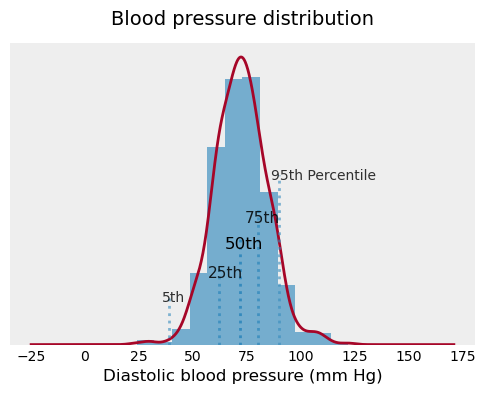

In [40]:
Bloodpressure_new = df[df['BloodPressure']>0]['BloodPressure']

fig, ax = plt.subplots(figsize = (6,4), dpi=100)

Bloodpressure_new.plot(kind = "hist", density = True,alpha = 0.65, bins = 12)
Bloodpressure_new.plot(kind = "kde")
ax.set_xlabel("Diastolic blood pressure (mm Hg)")
ax.set_title("Blood pressure distribution",size = 14, pad = 13)
ax.set_yticks([])
ax.set_ylabel("")
ax.tick_params(left = False, bottom = False)

plt.style.use("bmh")


quant_5, quant_25, quant_50, quant_75, quant_95 = df['BloodPressure'].quantile(0.05), df['BloodPressure'].quantile(0.25), df['BloodPressure'].quantile(0.5), df['BloodPressure'].quantile(0.75), df['BloodPressure'].quantile(0.95)


quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]

# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
    
    
ax.text(quant_5- 3, 0.005, "5th", size = 10, alpha = 0.8)
ax.text(quant_25- 5, 0.0077, "25th", size = 11, alpha = 0.85)
ax.text(quant_50- 7, 0.011, "50th", size = 12, alpha = 1)
ax.text(quant_75- 6, 0.014, "75th", size = 11, alpha = 0.85)
ax.text(quant_95- 4, 0.019, "95th Percentile", size = 10, alpha =.8)

ax.grid(False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
plt.show()

#### - Blood pressure distribution is simetric, because there is almost the same density on the left and right side of the distribution.  It is also observed simetry when contrasting average and median, in this case study both are aproximatly equal. In the other hand skewness is 0.13, near to zero, meaning, again, distribution is fairly simetric. 

#### - The right tail of the distribution is heavier than the left one, meaning that it is more likely to find someone with a blood pressure greater than or equal to 100 than someone with a blood pressure less than or equal to 50.

#### - Half of the sample has a blood pressure between 62 and 80, that´s why distribution shape looks like a mesokurtic distribution, in which extreme or outlier events are very unlikely.

#### - 25% of the sample has blood pressure level less or equal to 62. 

#### - 50% of the sample has blood pressure level less or equal to 72. Given that 72 is the average of the data and that the 50th percentile fell right at this point, we can say that there are approximately equal numbers of data below and above this.

#### - 75% of the sample has blood pressure level less or equal 80. 

#### - 95% of the sample has blood pressure level less or equal 90.

In [7]:
print(quant_25, quant_50, quant_75, quant_95, skew(Bloodpressure_new))


64.0 72.0 80.0 92.0 0.13387804741721232


In [8]:
print(np.mean(Bloodpressure_new), np.median(Bloodpressure_new))

72.40518417462484 72.0


### 6.	What is the 'BMI' for the person having the highest 'Glucose'?

In [9]:
df.loc[df['Glucose'].idxmax()]

Pregnancies                   1.000
Glucose                     199.000
BloodPressure                76.000
SkinThickness                43.000
Insulin                         NaN
BMI                          42.900
DiabetesPedigreeFunction      1.394
Age                          22.000
Outcome                       1.000
Name: 661, dtype: float64

#### BMI for the person with the highest glucose level is 42,9. 

### 7.	Are the three measures of central tendency equal?

In [10]:
print(np.mean(df['Glucose']) == np.median(df['Glucose']) == np.mode(df['Glucose']))

False


In [11]:
print("Average: ", np.mean(df['Glucose']))
print("Median: ", np.median(df['Glucose']))
print("Mode: ", mode(df['Glucose']))

Average:  121.6867627785059
Median:  nan
Mode:  100.0


#### Each central tendency measure is different.

### 8.	How many women's 'Glucose' level is above the mean level of 'Glucose'?

In [12]:
len(df['Glucose'][df['Glucose'] > np.mean(df['Glucose'])])

343

#### There is a total of 349 women whose glucose level is above the mean.

### 9.	Create the pairplot for variables 'Glucose', 'SkinThickness' and 'DiabetesPedigreeFunction'. Write you observations from the plot.

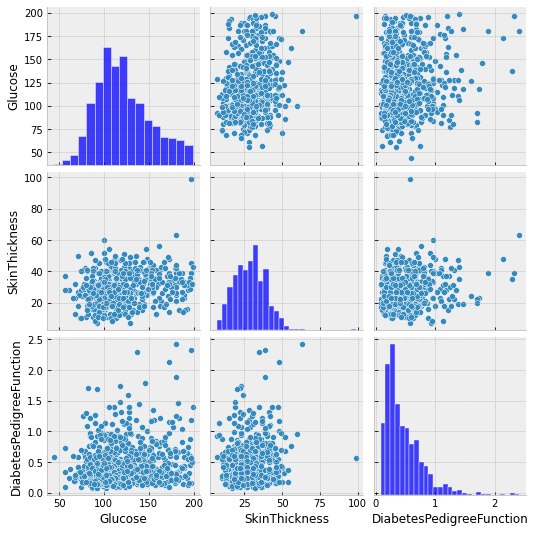

In [13]:
df_2 = df[['Glucose', 'SkinThickness','DiabetesPedigreeFunction']]
sns.pairplot(df_2)

#### Histograms: 

#### - The DiabetesPedigreeFunction variable has most of its data concentrated at the left end of the distribution and has few extreme values in the right zone. Seventy-five percent of the data range from 0 to 0.62.

#### - The SkinThickness variable is showing a measurement error, almost a 30% of the data is equal to zero, which is meaningless. The rest of the data exhibits a normal distribution shape.

#### - The Glucose variable has a shape similar to the normal distribution, but also several extreme values on the right side. Almost a 50% of  the data are greater than the mean, and it's dispersion is also greater than the data placed in the left side. 

#### Scatter plots:

#### No clear trends are observed in any of the three scatter plots, suggesting that these variables maintain a weak linear relationship. 

### 10.	Plot the scatterplot between 'Glucose' and 'Insulin'. Write your observations from the plot.

In [16]:
df_2 = df.copy()
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']] =  df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']].fillna(0)

stats.pearsonr(df_2[df_2['Insulin']>0]['Glucose'], df_2[df_2['Insulin']>0]['Insulin'])

(0.5800099317152835, 8.542970083867658e-37)

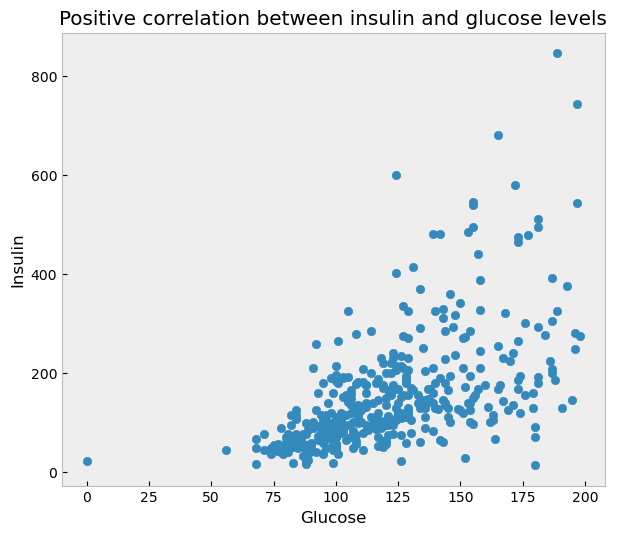

In [39]:
plt.subplots(figsize=(7,6), dpi=100)
plt.scatter(df[df['Insulin']>0]['Glucose'], df[df['Insulin']>0]['Insulin'])
plt.title('Positive correlation between insulin and glucose levels')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.grid(False)
plt.show()

#### The graph suggests that moderate glucose levels are associated with moderate insulin levels in most cases, and as the glucose level increases so does the number of cases with high insulin levels, suggesting a positive correlation between these variables. When calculating the pearson correlation coefficient, a positive correlation of 0.58 is founded. 

### 11.	Plot histograms for variable Age to understand the number of women in different Age groups given that they have diabetes or not. Explain both histograms and compare them.

C:\Users\dr10a\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dr10a\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


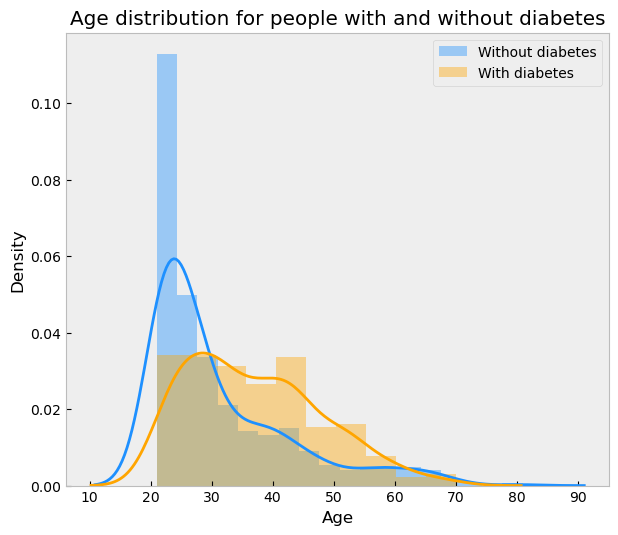

In [28]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df.loc[df.Outcome==0, "Age"] , color="dodgerblue", label="Without diabetes")
sns.distplot( df.loc[df.Outcome==1 , "Age"] , color="orange", label="With diabetes")

plt.title('Age distribution for people with and without diabetes')
plt.grid(False)
plt.legend();

#### The histogram of people without diabetes resembles a normal distribution with extreme values to the right, indicating that the majority of healthy people are young adults in their 20s and 30s. 


#### The histogram of people with diabetes resembles a bimodal distribution, whose population is concentrated in the population aged 30 and 40 years, and has extreme values to the right.

#### The most relevant conclusion from the graph is that the average age of people with diabetes is greater than the people without diabetes, with the majority of those with diabetes being in their 30s and 50s. It is also noted that most people in their twenties are healthy. After the age of 60, there are approximately the same number of people with and without diabetes, indicating a decrease in diabetes cases after this age.

### 12. What is Inter Quartile Range of all the variables? Why is it used? Which plot visualizes the same?

#### The interquartile range is the distance between the first quartile and the third quartile, it´s used as a measure of dispersion. Box plot allows to observe the interquartile range through the width of the box. Below is displayed a table with every Quartile range and box plots for all variables.

In [71]:
counter = []
for x in df:
    counter.append(df[x].quantile([0.25,0.75]))

interquartile = pd.DataFrame(counter)
interquartile = interquartile.rename(columns = { 0.25 : 'Q1', 0.75 : 'Q3'})
interquartile['interquartile'] = interquartile['Q3'] -  interquartile['Q1']
interquartile

,Q1,Q3,interquartile
Pregnancies,1.00000,6.00000,5.0000
Glucose,99.00000,140.25000,41.2500
BloodPressure,62.00000,80.00000,18.0000
SkinThickness,0.00000,32.00000,32.0000
Insulin,0.00000,127.25000,127.2500
BMI,27.30000,36.60000,9.3000
DiabetesPedigreeFunction,0.24375,0.62625,0.3825
Age,24.00000,41.00000,17.0000
Outcome,0.00000,1.00000,1.0000


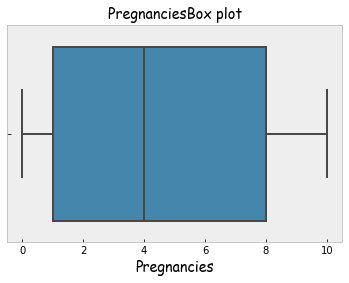

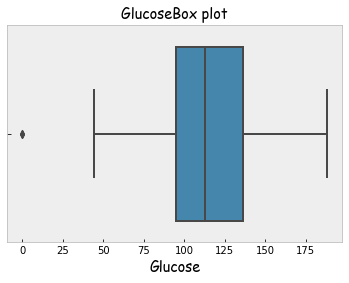

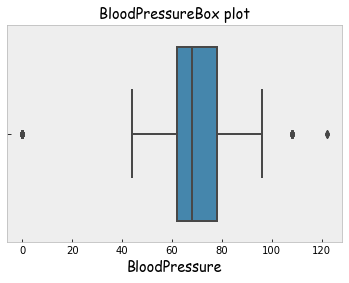

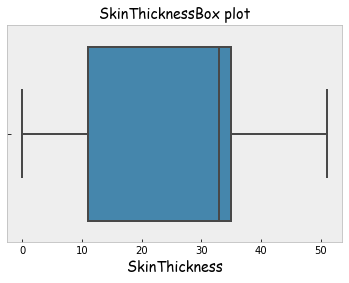

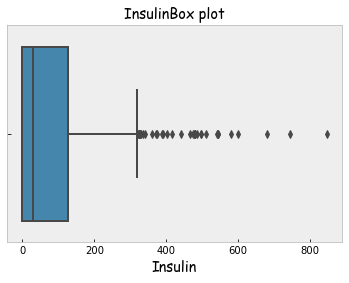

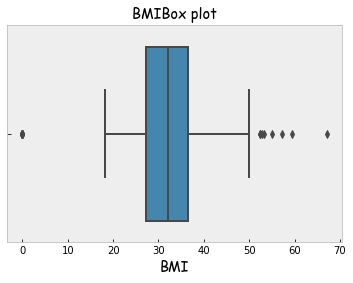

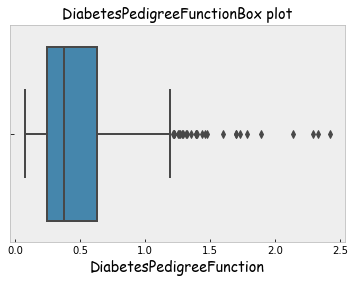

In [96]:
df_3 = df.copy()
df_3 = df_3.iloc[:, 0:7]
for x in df_3:
    sns.boxplot(x= df_3[x], data = df_3[x])
    plt.xlabel(str(x),fontfamily = 'fantasy' ,
    fontsize = 'x-large' )
    plt.title(str(x) + "Box plot" ,
    fontfamily = 'fantasy', fontsize = 'x-large' )
    plt.grid(False)
    plt.show() 

### 13.	Find and visualize the the correlation matrix. Write your observations from the plot.

<AxesSubplot:>

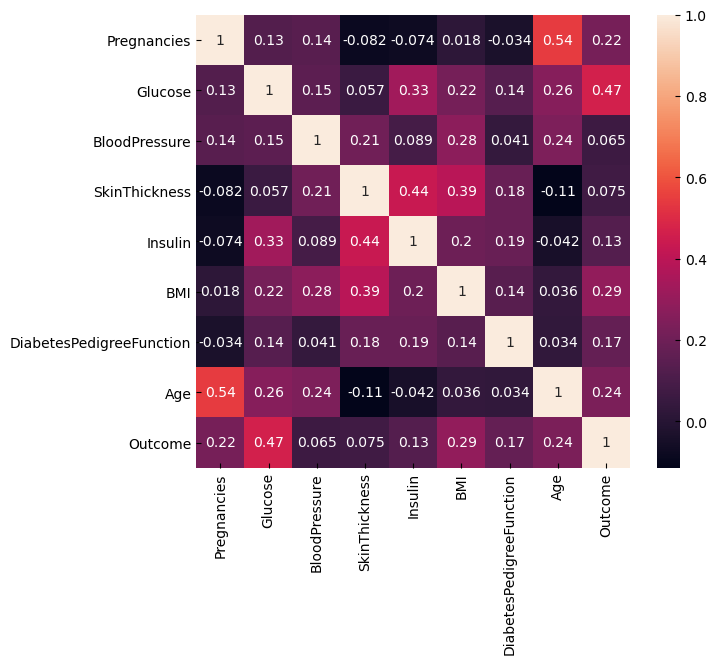

In [102]:
plt.subplots(figsize=(7,6), dpi=100)
sns.heatmap(df.corr(), annot=True)

#### The strongest correlation is between the variable Age and Pregnancies, which makes sense, since women have more children as they get older.  
#### As we have seen before, there is a strong correlation between glucose level and insulin.
#### There is also a high correlation between the glucose level and the fact of having diabetes.
#### There is a moderate correlation between blood pressure level and BMI, which makes sense, because according to modern medicine, high blood pressure is a consequence of being overweight.
#### Skinthickness has a high positive correlation with insulin level and BMI.


### 14. What is your recommendation for the missing values in the data? How do you think we can counter it?

#### First of all, from the characteristics of the data set and its missing values, it seems that these are missing by chance, probably due to some measurement error. This is due to the fact that in the variables with missing values the number of these values differs in each one, besides the position of these missing values does not correspond between one variable and another. Based on the above, the imputation methods are valid, since we know that we will not be biasing the data.

#### There are variables whose number of missing data are very few, so for simplicity they can be imputed with the average of each variable, this would be the case for Glucose and Bloodpressure which have 5 and 35 missing data respectively out of a total of 768 data, i.e. 0.6% and 4.5%. 

#### On the other hand, in the case of Skinthickness and insulin with 227(30%) and 374(49%) missing data respectively, more elaborate methods are recommended, otherwise the distribution of these variables may change drastically, as it would if one chooses to simply eliminate them. One of these methods could be to interpolate the data using regression, in this case, a multiple regression model is estimated with the variables in the data set so that missing data can be replaced with the result of the regression.



### 15.	What your recommendation for modelling? 

#### So far, the descriptive analysis has helped us to understand how the variables are related to each other and how they are associated with the outcome variable, since it is of interest to know how these variables affect the diagnosis of diabetes in a person of the Pima tribe. 

#### The diabetes variable is a categorical variable represented in a binary form in the data set. Therefore, the most appropriate model would be a classification model. 

#### From this point, we can take two approaches, an analytical one, in which we seek to calculate unbiased coefficients that capture the effect of each of these variables on diabetes, in which case we would use a logit or probit approache.

#### In the other hand, we can implement a machine learning algorithm such as random forest, random tree, XGboost, or neural networks that by design will have better predictive power but whose interpretability is more difficult to achieve. Although there are already methodologies for this, for example by analyzing the Shap values, but they do not offer the same degree of certainty as those mentioned above. Finally, it is recommended to test each of these models and then look at the confusion matrix, the ROC curves and analyze the area under these curves to determine which of all is the best model to predict. 